In [3]:
from pyannote.core import notebook, Segment
from pyannote.database.util import load_rttm
from pyannote.audio import Model, Inference
from pyannote.audio.pipelines.speaker_diarization import SpeakerDiarization
from pyannote.metrics.diarization import DiarizationErrorRate
from pyannote.audio import Pipeline

In [4]:
from tqdm import tqdm as tqdm

import pandas as pd
import os, sys
from pathlib import Path
import logging

## get rttm file with 'difference'

In [5]:
FILENAME_DIR = "/media/jculnan/backup/From LIVES folder/diarized_files/difference_rttms"
comparison = f"{FILENAME_DIR}/RE2ae3a8526e6b62f71edfca298403456c_difference.rttm"

In [10]:
# cannot load this using load_rttm for some reason -- try pandas read_csv
pred = pd.read_csv(comparison, 
                   sep=" ", 
                   header=None, 
                   names=["ignore", 
                          "file", 
                          "na1", 
                          "start_time", 
                          "duration", 
                          "na2", 
                          "na3", 
                          "na4", 
                          "na5"])
pred

ignore   file   na1 start_time  \
SPEAKER RE2ae3a8526e6b62f71edfca298403456c 1    1.236  0.021  <NA>       <NA>   
                                           1    1.257  1.181  <NA>       <NA>   
                                           1    2.438  0.026  <NA>       <NA>   
                                           1    2.964  0.149  <NA>       <NA>   
                                           1    3.113  2.076  <NA>       <NA>   
...                                               ...    ...   ...        ...   
                                           1  910.482  1.198  <NA>       <NA>   
                                           1  911.680  0.034  <NA>       <NA>   
                                           1  911.680  0.034  <NA>       <NA>   
                                           1  911.714  0.624  <NA>       <NA>   
                                           1  912.507  0.624  <NA>       <NA>   

                                                 duration            na2  \
SPEAKER RE2ae3a8526e6b62f71edfca298403456c 1     ('missed    detection',   
                                           1  ('correct',  'SPEAKER_00',   
                                           1     ('missed    detection',   
                                           1     ('missed    detection',   
                                           1  ('correct',  'SPEAKER_01',   
...                                                   ...            ...   
                                           1      ('false        alarm',   
                                           1      ('false        alarm',   
                                           1      ('false        alarm',   
                                           1      ('false        alarm',   
                                           1      ('false        alarm',   

                                                        na3       key_info  \
SPEAKER RE2ae3a8526e6b62f71edfca298403456c 1  'SPEAKER_00',          None)   
                                           1  'SPEAKER_00')           <NA>   
                                           1  'SPEAKER_00',          None)   
                                           1  'SPEAKER_01',          None)   
                                           1  'SPEAKER_01')           <NA>   
...                                                     ...            ...   
                                           1          None,  'SPEAKER_00')   
                                           1          None,  'SPEAKER_00')   
                                           1          None,  'SPEAKER_01')   
                                           1          None,  'SPEAKER_01')   
                                           1          None,  'SPEAKER_00')   

                                               na4   na5  
SPEAKER RE2ae3a8526e6b62f71edfca298403456c 1  <NA>  <NA>  
                                           1  <NA>   NaN  
                                           1  <NA>  <NA>  
                                           1  <NA>  <NA>  
                                           1  <NA>   NaN  
...                                            ...   ...  
                                           1  <NA>  <NA>  
                                           1  <NA>  <NA>  
                                           1  <NA>  <NA>  
                                           1  <NA>  <NA>  
                                           1  <NA>  <NA>  

[656 rows x 10 columns]

In [7]:
pred = load_rttm(comparison)["RE2ae3a8526e6b62f71edfca298403456c_difference"]

ValueError: could not convert string to float: '<NA>'

In [4]:
ROOT_DIR = "/media/jculnan/backup/pull-twilio-recording-script-data"
FILENAME_DIR = "/media/jculnan/backup/From LIVES folder"
TEST_PRED = f"{FILENAME_DIR}/diarized_files"
TEST_GOLD = f"{FILENAME_DIR}/diarization_effort/manually_annotated/test_all"

In [5]:
pred_path = Path(TEST_PRED)
gold_path = Path(TEST_GOLD)
gold_files = [f.name for f in gold_path.iterdir()]

In [18]:
for f in pred_path.iterdir():
    if f.suffix == ".rttm":
        if f.name in gold_files:
            pred = load_rttm(f)[f.stem]
            gold = load_rttm(gold_path / f.name)[f.stem]
            
            # get gold info 
            gold_info = pd.read_csv(gold_path / f.name,
                                    header=None,
                                    names=["na0",
                                           "file",
                                           "num",
                                           "start_time",
                                           "dur",
                                           "na1",
                                           "na2",
                                           "speaker",
                                           "na3",
                                           "na4"],
                                    sep=" ")
            gold_info['end_time'] = gold_info['start_time'] + gold_info['dur']
            
            x_max = gold_info['end_time'].iloc[-1]
            
            x = 0
            while x < x_max:
                EXCERPT = Segment(x, x+100)
                notebook.crop = EXCERPT
                
                print(f"NOW SHOWING COMPARISON FOR {f.stem} from {x} to {x+50}")
#                 gold.discretize()
#                 print(gold.get_timeline())
                pred
                
                x += 100
            break
                

NOW SHOWING COMPARISON FOR RE03d2270a7c67f2b3bb55edf7dfc7901a from 0 to 50
NOW SHOWING COMPARISON FOR RE03d2270a7c67f2b3bb55edf7dfc7901a from 100 to 150
NOW SHOWING COMPARISON FOR RE03d2270a7c67f2b3bb55edf7dfc7901a from 200 to 250
NOW SHOWING COMPARISON FOR RE03d2270a7c67f2b3bb55edf7dfc7901a from 300 to 350
NOW SHOWING COMPARISON FOR RE03d2270a7c67f2b3bb55edf7dfc7901a from 400 to 450
NOW SHOWING COMPARISON FOR RE03d2270a7c67f2b3bb55edf7dfc7901a from 500 to 550
NOW SHOWING COMPARISON FOR RE03d2270a7c67f2b3bb55edf7dfc7901a from 600 to 650


In [13]:
print(type(gold))

<class 'pyannote.core.annotation.Annotation'>


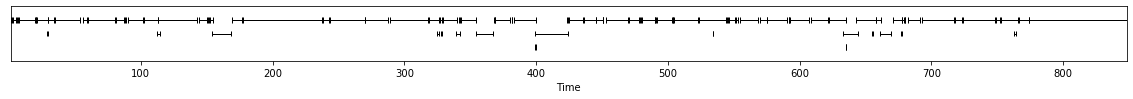

In [14]:
gold.get_timeline()

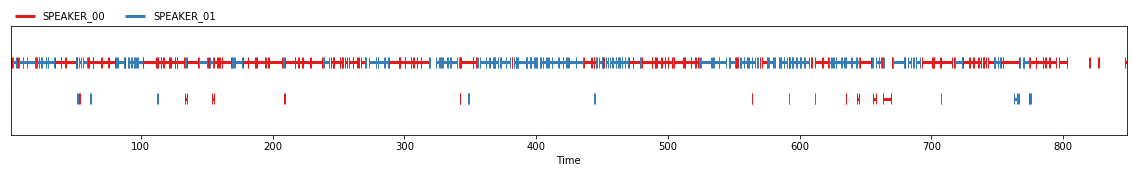

In [11]:
pred

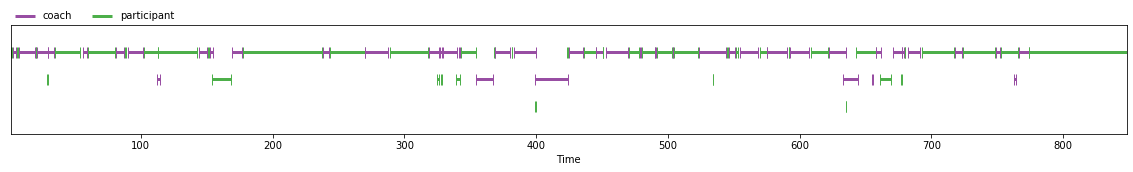

In [12]:
gold

In [28]:
EXCERPT = Segment(50,100)

In [29]:
notebook.crop = EXCERPT

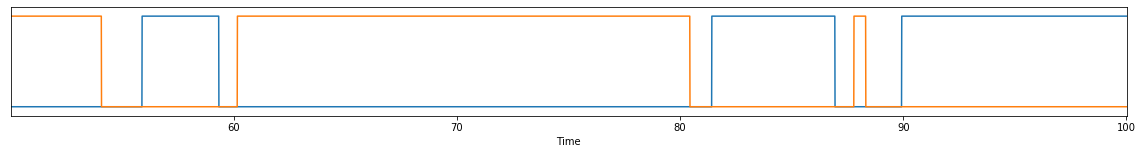

In [30]:
gold.discretize()